## Exploratory Data Analisys
### Topic (**Inflation**) according to each news portal

### Load
Data

In [86]:
import pandas as pd
import numpy as np
import pickle

In [87]:
data = pickle.load(open('data/df_clean_izq.pkl','rb'))

In [88]:
inf_izq = data.loc[data.topics == 'inflation']
inf_izq.shape

(37, 7)

In [89]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))

In [90]:
inf_der = data.loc[data.topics == 'inflation']
inf_der.shape

(42, 7)

Tokens

In [91]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

In [92]:
tokens_izq_inf = tokens_izq[tokens_izq.topics == 'inflation'].drop('topics', axis=1)

In [93]:
tokens_der_inf = tokens_der[tokens_der.topics == 'inflation'].drop('topics', axis=1)

### Versus

#### Length
How many words?

In [94]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import unidecode

In [95]:
stopwords_sp = stopwords.words('spanish')

In [96]:
def tokenizer(texto):

    alphanumeric = re.sub(r'([^\s\w]|_)+', '', texto).lower()
    no_accents = unidecode.unidecode(alphanumeric)
    
    tockens = word_tokenize(no_accents)
    
    tockens_clean = [tocken for tocken in tockens if tocken not in stopwords_sp and tocken.isalpha()]
    
    terminos = tockens_clean

    return terminos

In [97]:
words_izq = [tokenizer(documento) for documento in inf_izq.body.values]
words_der = [tokenizer(documento) for documento in inf_der.body.values]

In [98]:
def average_words(docs):
    words = sum([len(doc) for doc in docs])
    return round(words / len(docs), 2)

print(f"Izquierda Diario: {average_words(words_izq)} average words per document.")
print(f"Derecha Diario: {average_words(words_der)} average words per document.")

Izquierda Diario: 171.84 average words per document.
Derecha Diario: 310.76 average words per document.


#### Lexicon
How many unique words?

In [99]:
def average_uniques(docs):
    avg = []
    for doc in docs:
        avg.append(len(set(doc)) / len(doc))
    return round(sum(avg) / len(docs), 2)

In [100]:
print(f"Izquierda Diario: {average_uniques(words_izq)} average unique words per document.")
print(f"Derecha Diario: {average_uniques(words_der)} average unique words per document.")

Izquierda Diario: 0.81 average unique words per document.
Derecha Diario: 0.76 average unique words per document.


### Clouds
Word count per corpus

In [101]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [102]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [103]:
top_words_izq = count_words(tokens_izq_inf)

In [104]:
words_izq = [word for docs, w_counts in top_words_izq.items() for word in list(word for word, num in w_counts)]

In [105]:
top_words_der = count_words(tokens_der_inf)

In [106]:
words_der = [word for docs, w_counts in top_words_der.items() for word in list(word for word, num in w_counts)]

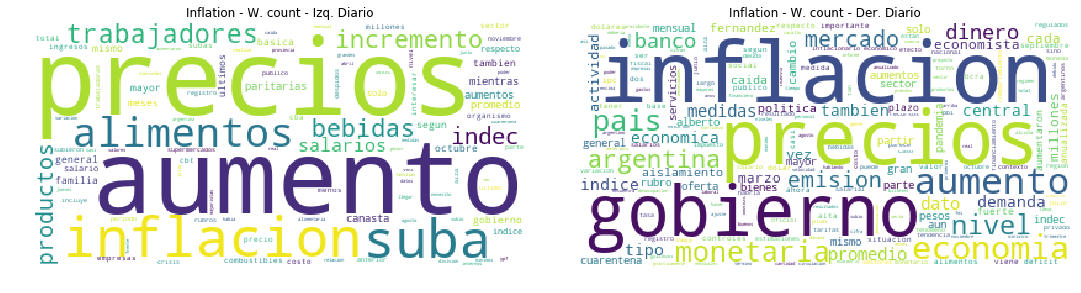

In [121]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')
titles = ['Inflation - W. count - Izq. Diario', 'Inflation - W. count - Der. Diario']

for words, ax, title in zip([words_izq, words_der], axes.flatten(), titles):
    cloud.generate_from_frequencies(dict(Counter(words).most_common()))
    ax.imshow(cloud)
    ax.set_title(title)
    ax.axis('off')
    
plt.show()

#### TfIDf
TfIDf score count per corpus

In [108]:
from sklearn.feature_extraction.text import TfidfTransformer

In [109]:
tfidf_izq = TfidfTransformer().fit_transform(tokens_izq_inf)
tfidf_der = TfidfTransformer().fit_transform(tokens_der_inf)

In [110]:
tfidf_izq_df = pd.DataFrame(tfidf_izq.todense(), columns = tokens_izq_inf.columns)
tfidf_der_df = pd.DataFrame(tfidf_der.todense(), columns = tokens_der_inf.columns)

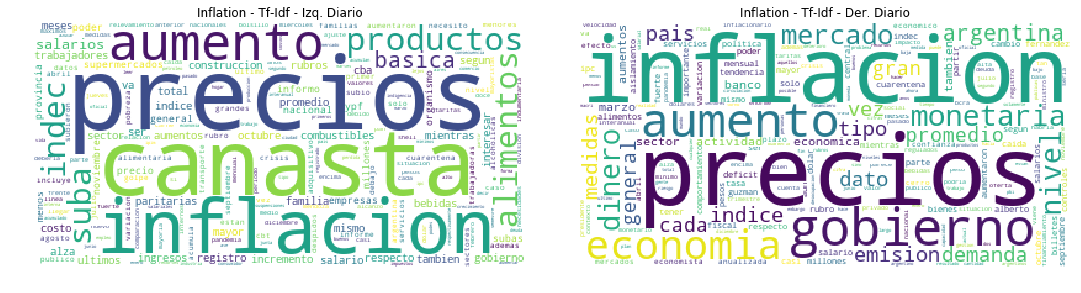

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

titles = ['Inflation - Tf-Idf - Izq. Diario', 'Inflation - Tf-Idf - Der. Diario']

for df, ax, title in zip([tfidf_izq_df, tfidf_der_df], axes.flatten(), titles):
    cloud.generate_from_frequencies(df.sum(axis=0).sort_values())
    ax.imshow(cloud)
    ax.set_title(title)
    ax.axis('off')
    
plt.show()

Observation
    
At first glance, it is clear that each news portal focuses on distintc themes around the same subject. Words like "productos", "salarios", "canasta" are absent in "derecha diario", while "dinero", "mercado", "monetaria" do not appear in "izquierda diario" corpus.

According to this exploratory analisys, it is not so counter-intuitive to infer that one gives more relevance to the efect of inflation over the prices of goods and wages, while the other seems to be more interested in giving a reason to the subject matter from a monetarist point of view.